In [1]:
import pandas as pd
import numpy as np
beta=1 #STIFFNESS
# Loading and trasforming into a numpy matrix the dataset
df=pd.read_csv('Iris.csv')
selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data_matrix = df[selected_columns].to_numpy()
print("Data matrix:")
print(data_matrix)
print(f"shape: {data_matrix.shape}")

Data matrix:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]

In [2]:
#Finding the range of the dataset
max_values=df[selected_columns].max()
min_values=df[selected_columns].min()

# Generate initial centroids randomly within the range of the dataset
initial_centroids=np.random.uniform(min_values, max_values, (3,4))
print("Initial centroids:")
print(initial_centroids)

Initial centroids:
[[6.71077359 2.21648128 1.53869143 2.18511004]
 [4.79243908 3.7261807  5.68026469 1.17996767]
 [7.56386095 4.27540718 2.21315246 1.70450932]]


In [3]:
# Euclidean distance function
def d(a,b):
    return np.sqrt(np.sum((a-b)**2))

In [4]:
# First assignment
responsibilities=np.zeros((data_matrix.shape[0],3))
for i in range(data_matrix.shape[0]):
    distances = np.array([d(data_matrix[i], centroid) for centroid in initial_centroids])
    responsibilities[i]=np.exp(-beta*distances)/np.sum(np.exp(-beta*distances))
#print("Initial responsibilities:")
#print(responsibilities)


In [5]:
for k in range(10):
    # Calculating the new centroids
    for j in range(3):
        r_j = responsibilities[:, j] # prendo le colonne della matrice responsibilities
        initial_centroids[j] = np.sum(r_j[:, np.newaxis] * data_matrix, axis=0) / np.sum(r_j)

    # Updating the responsibilities with the new centroids
    for i in range(data_matrix.shape[0]):
        distances = np.array([d(data_matrix[i], centroid) for centroid in initial_centroids])
        responsibilities[i]=np.exp(-beta*distances)/np.sum(np.exp(-beta*distances))

print(np.sum(responsibilities[:, 0]))
print(np.sum(responsibilities[:, 1]))
print(np.sum(responsibilities[:, 2]))
print(responsibilities)

52.04316286766195
49.180469376908356
48.7763677554297
[[0.94328363 0.02204979 0.03466658]
 [0.9374661  0.02405833 0.03847557]
 [0.94229178 0.02221809 0.03549013]
 [0.93511231 0.0249124  0.03997528]
 [0.94283139 0.0222357  0.03493291]
 [0.90388714 0.03796804 0.05814481]
 [0.94024171 0.02305822 0.03670007]
 [0.94519907 0.02122538 0.03357555]
 [0.92744704 0.02777711 0.04477585]
 [0.93921697 0.02340161 0.03738143]
 [0.92599837 0.0290581  0.04494353]
 [0.94175037 0.02249979 0.03574984]
 [0.93725161 0.02411247 0.03863592]
 [0.93538952 0.02476467 0.03984582]
 [0.9032917  0.03864465 0.05806364]
 [0.87255389 0.05148898 0.07595713]
 [0.92131957 0.03108091 0.04759952]
 [0.94282161 0.02223563 0.03494276]
 [0.88754546 0.04462896 0.06782558]
 [0.93274198 0.02632669 0.04093133]
 [0.92385142 0.02969203 0.04645655]
 [0.93468041 0.02551731 0.03980228]
 [0.94355055 0.02187145 0.034578  ]
 [0.93532788 0.02504191 0.03963021]
 [0.92591408 0.02860605 0.04547987]
 [0.93278806 0.02586607 0.04134587]
 [0.943552

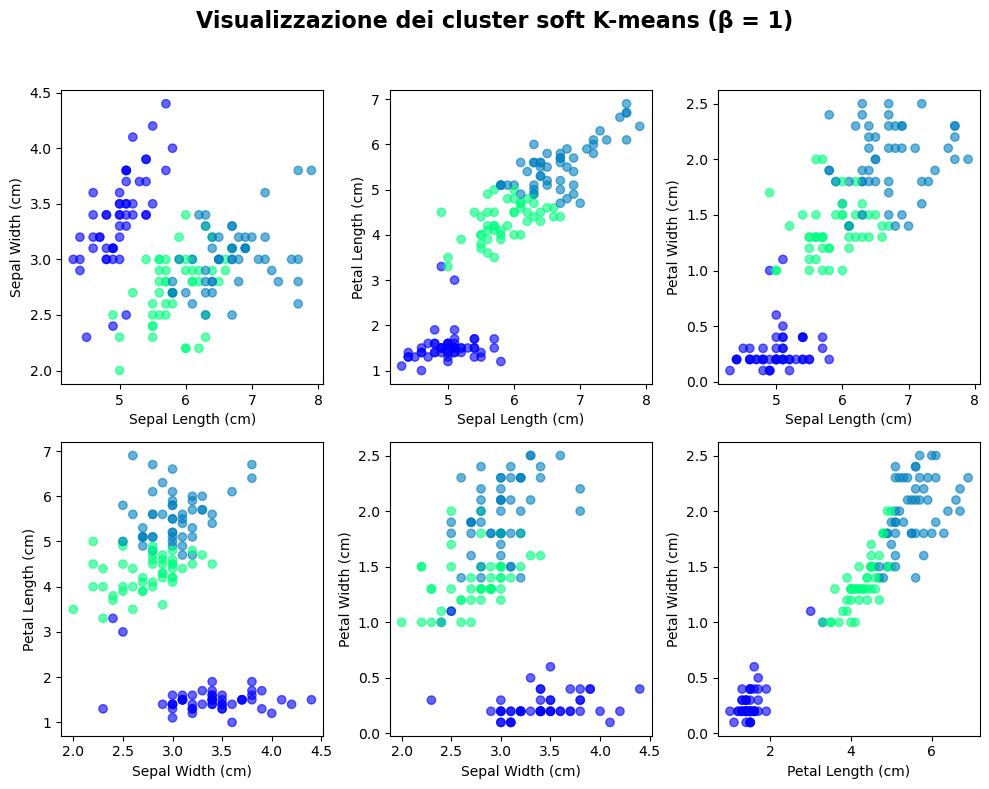

In [6]:
import matplotlib.pyplot as plt

soft_assignments = np.argmax(responsibilities, axis=1)

fig, axes = plt.subplots(2, 3, figsize=(10, 8))

axes[0, 0].scatter(data_matrix[:,0], data_matrix[:,1], c=soft_assignments, cmap='winter', alpha=0.6)
axes[0, 0].set_xlabel("Sepal Length (cm)")
axes[0, 0].set_ylabel("Sepal Width (cm)")

axes[0, 1].scatter(data_matrix[:,0], data_matrix[:,2], c=soft_assignments, cmap='winter', alpha=0.6)
axes[0, 1].set_xlabel("Sepal Length (cm)")
axes[0, 1].set_ylabel("Petal Length (cm)")

axes[0, 2].scatter(data_matrix[:,0], data_matrix[:,3], c=soft_assignments, cmap='winter', alpha=0.6)
axes[0, 2].set_xlabel("Sepal Length (cm)")
axes[0, 2].set_ylabel("Petal Width (cm)")

axes[1, 0].scatter(data_matrix[:,1], data_matrix[:,2], c=soft_assignments, cmap='winter', alpha=0.6)
axes[1, 0].set_xlabel("Sepal Width (cm)")
axes[1, 0].set_ylabel("Petal Length (cm)")

axes[1, 1].scatter(data_matrix[:,1], data_matrix[:,3], c=soft_assignments, cmap='winter', alpha=0.6)
axes[1, 1].set_xlabel("Sepal Width (cm)")
axes[1, 1].set_ylabel("Petal Width (cm)")

axes[1, 2].scatter(data_matrix[:,2], data_matrix[:,3], c=soft_assignments, cmap='winter', alpha=0.6)
axes[1, 2].set_xlabel("Petal Length (cm)")
axes[1, 2].set_ylabel("Petal Width (cm)")

fig.suptitle("Visualizzazione dei cluster soft K-means (β = 1)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
fig.savefig("soft_k_means_cluster_grid.pdf", format="pdf")